## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [4]:
df = pd.read_csv('distance_dataset (1).csv', index_col=0)

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [5]:
# Create the 2D matrix containing the 'Y' and 'Z' columns
matrix_2d = df[['Y', 'Z']].to_numpy()

# Create the 3D matrix containing the 'X', 'Y', and 'Z' columns
matrix_3d = df[['X', 'Y', 'Z']].to_numpy()

# Display the shapes of the matrices to ensure correctness
print("Shape of the 2D matrix:", matrix_2d.shape)
print("Shape of the 3D matrix:", matrix_3d.shape)

# Display the first few rows of each matrix
print("First few rows of the 2D matrix:\n", matrix_2d[:5])
print("First few rows of the 3D matrix:\n", matrix_3d[:5])

Shape of the 2D matrix: (2000, 2)
Shape of the 3D matrix: (2000, 3)
First few rows of the 2D matrix:
 [[4.16754224 5.7876354 ]
 [5.77090875 6.0910442 ]
 [7.54043595 3.2472394 ]
 [5.06924901 5.76831344]
 [2.40237389 3.87910086]]
First few rows of the 3D matrix:
 [[5.13577939 4.16754224 5.7876354 ]
 [4.2807207  5.77090875 6.0910442 ]
 [8.3290979  7.54043595 3.2472394 ]
 [5.47022447 5.06924901 5.76831344]
 [2.38179703 2.40237389 3.87910086]]


Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [7]:
# Calculate the cosine similarity for the 3D matrix with the reference point (5,5,5)
reference_point_3d = np.array([[5, 5, 5]])
cosine_sim_3d = cosine_similarity(matrix_3d, reference_point_3d)

# Subtract cosine similarity from 1 to create the new feature
simCosine3D = 1. - cosine_sim_3d

# Calculate the cosine similarity for the 2D matrix with the reference point (5,5)
reference_point_2d = np.array([[5, 5]])
cosine_sim_2d = cosine_similarity(matrix_2d, reference_point_2d)

# Subtract cosine similarity from 1 to create the new feature
simCosine2D = 1. - cosine_sim_2d

# Add these new features to the dataframe
df['SimCosine3D'] = simCosine3D
df['SimCosine2D'] = simCosine2D

# Display the updated dataframe
print(df.head())

          X         Y         Z  ClusterID  SimCosine3D  SimCosine2D
0  5.135779  4.167542  5.787635          4     0.008640     0.012985
1  4.280721  5.770909  6.091044          4     0.010576     0.000364
2  8.329098  7.540436  3.247239          2     0.056269     0.070875
3  5.470224  5.069249  5.768313          4     0.001385     0.002074
4  2.381797  2.402374  3.879101          1     0.028225     0.026539


Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

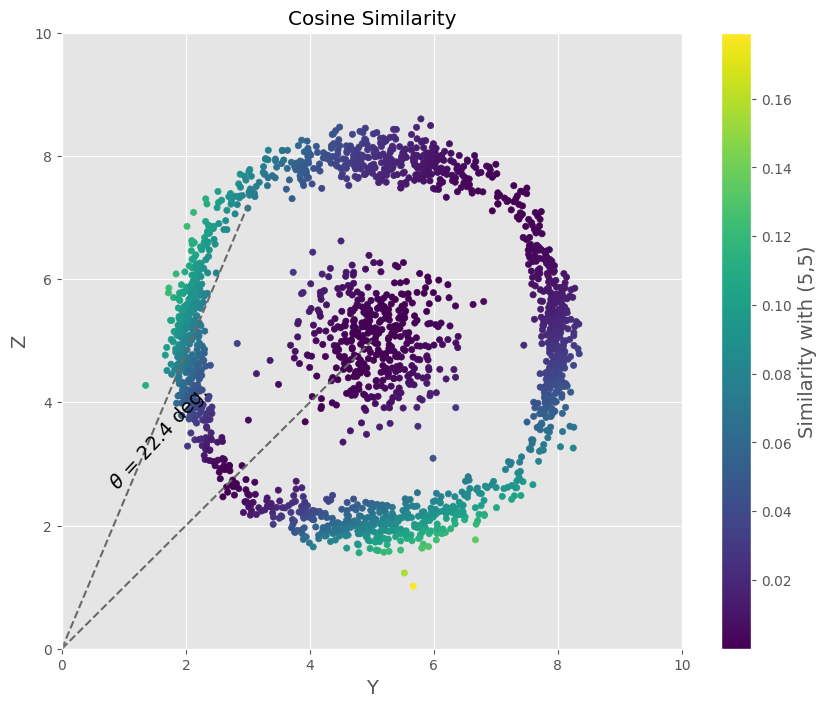

In [9]:
# Plotting the cosine similarity for the 2D matrix
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine2D[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

plt.show()

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

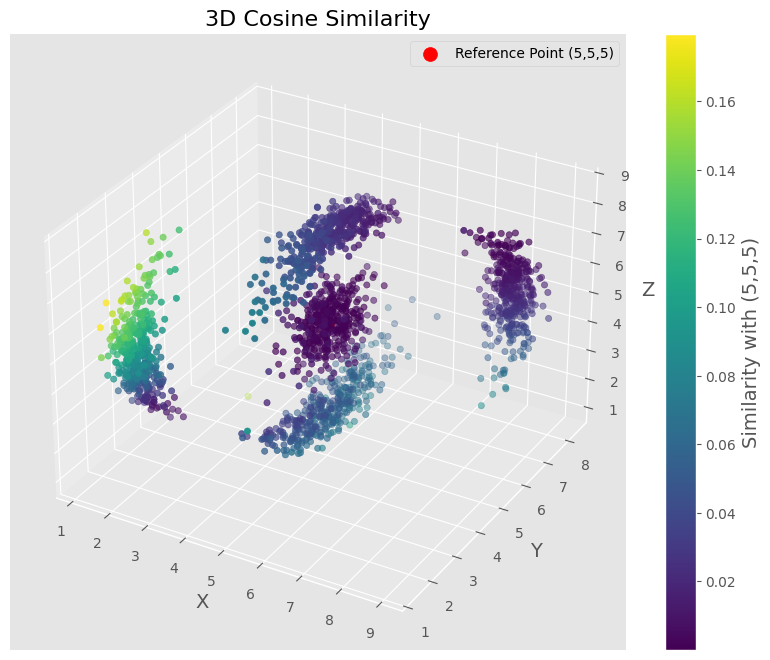

In [11]:
# Plotting the 3D matrix with cosine similarity
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(df.X, df.Y, df.Z, c=simCosine3D[:,0], s=20, cmap='viridis')

# Add the reference point
ax.scatter(5, 5, 5, color='red', s=100, label='Reference Point (5,5,5)')

# Labels and title
ax.set_xlabel('X', size=14)
ax.set_ylabel('Y', size=14)
ax.set_zlabel('Z', size=14)
ax.set_title('3D Cosine Similarity', size=16)

# Colorbar
cb = plt.colorbar(sc)
cb.set_label('Similarity with (5,5,5)', size=14)

plt.legend()
plt.show()

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define the documents
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

# Create the CountVectorizer instance
count_vect = CountVectorizer()

# Fit and transform the corpus
corpus = [Document1, Document2]
X_train_counts = count_vect.fit_transform(corpus)

# Create a DataFrame from the transformed corpus
pd.DataFrame(X_train_counts.toarray(), columns=count_vect.get_feature_names_out(), index=['Document 0', 'Document 1'])


,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Define the documents
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

# Create the TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
corpus = [Document1, Document2]
trsfm = vectorizer.fit_transform(corpus)

# Create a DataFrame from the transformed corpus
pd.DataFrame(trsfm.toarray(), columns=vectorizer.get_feature_names_out(), index=['Document 0', 'Document 1'])


,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [16]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Define multiple documents
Document1 = "Machine learning is a method of data analysis that automates analytical model building."
Document2 = "Artificial intelligence and machine learning are transforming industries with data-driven insights."
Document3 = "Deep learning is a subset of machine learning that deals with neural networks and large amounts of data."
Document4 = "Data science involves preparing data for analysis and using models to extract insights from data."

# Combine the documents into a corpus
corpus = [Document1, Document2, Document3, Document4]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [18]:
# Create the TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
trsfm = vectorizer.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [19]:
# Create a DataFrame from the transformed corpus
df_tfidf = pd.DataFrame(trsfm.toarray(), columns=vectorizer.get_feature_names_out(), index=['Document 0', 'Document 1', 'Document 2', 'Document 3'])


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [21]:
# Create the TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
trsfm = vectorizer.fit_transform(corpus)



 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [22]:
# Compute cosine similarity for all pairs of documents
cosine_sim = cosine_similarity(trsfm)

# Print TF-IDF matrix (optional)
# df_tfidf = pd.DataFrame(trsfm.toarray(), columns=vectorizer.get_feature_names_out(), index=['Document 0', 'Document 1', 'Document 2', 'Document 3'])
# print("TF-IDF Matrix:")
# print(df_tfidf)

# Print cosine similarity matrix
print("\nCosine Similarity Matrix:")
print(pd.DataFrame(cosine_sim, index=['Document 0', 'Document 1', 'Document 2', 'Document 3'], columns=['Document 0', 'Document 1', 'Document 2', 'Document 3']))


Cosine Similarity Matrix:
            Document 0  Document 1  Document 2  Document 3
Document 0    1.000000    0.125605    0.362484    0.135733
Document 1    0.125605    1.000000    0.227613    0.172529
Document 2    0.362484    0.227613    1.000000    0.090185
Document 3    0.135733    0.172529    0.090185    1.000000
